In [1]:
import tensorflow as tf
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#np.set_printoptions(threshold=np.inf)
import time
import csv

In [2]:
filename = "slp03"

In [3]:
time = []
ecg = []
bp = []
eeg = []
resp = []

In [4]:
def read_file(filename,time, ecg, bp, eeg, resp):
    filename = "data/"+filename+".csv"
    with open(filename,newline='',encoding = 'utf-8') as csvfile:
        reader = csv.reader (csvfile)
        for row in reader:
            time.append(row[0])
            ecg.append(row[1])
            bp.append(row[2])
            eeg.append(row[3])
            resp.append(row[4])

In [5]:
read_file(filename, time, ecg, bp, eeg, resp)
print (len(time))

15002


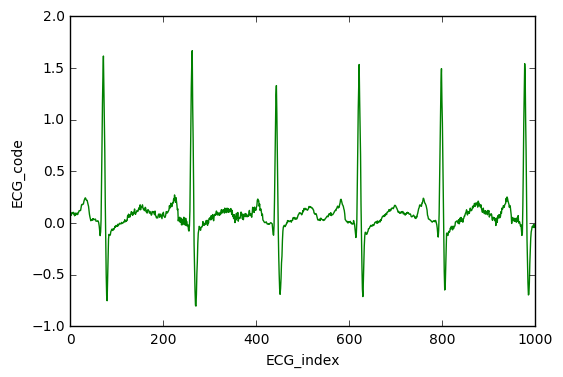

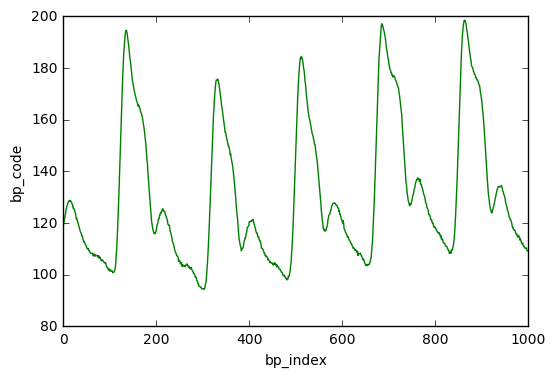

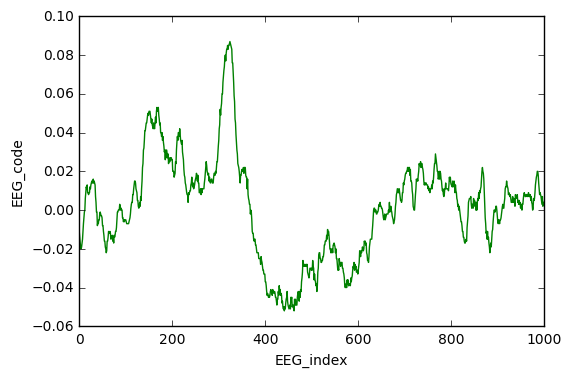

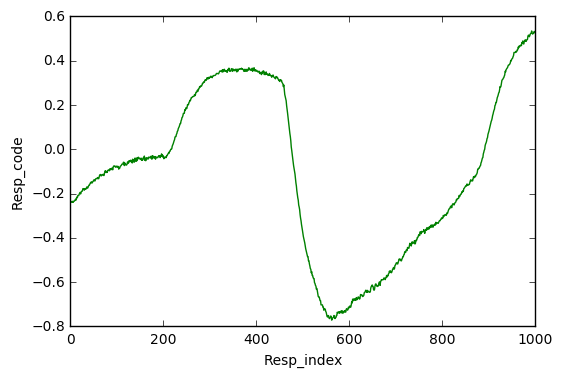

In [8]:
plt.plot(ecg[2:1002],'g-')
plt.xlabel('ECG_index')
plt.ylabel('ECG_code')
plt.show()
plt.plot(bp[2:1002],'g-')
plt.xlabel('bp_index')
plt.ylabel('bp_code')
plt.show()
plt.plot(eeg[2:1002],'g-')
plt.xlabel('EEG_index')
plt.ylabel('EEG_code')
plt.show()
plt.plot(resp[2:1002],'g-')
plt.xlabel('Resp_index')
plt.ylabel('Resp_code')
plt.show()